In [1]:
# importing libraries
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

# reading the data
df = pd.read_csv('https://raw.githubusercontent.com/dipanshuagarwal/Stock-Market-Forecasting/master/Dataset/dataset11-19.csv')

# looking at the first five rows of the data
print(df.head())
print('\n Shape of the data:')
print(df.shape)

# setting the index as date
df['Date'] = pd.to_datetime(df.Date,format='%d-%m-%Y')
df.index = df['Date']

#creating dataframe with date and the target variable
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]

# NOTE: While splitting the data into train and validation set, we cannot use random splitting since that will destroy the time component. 
# So here we have set the last year’s data into validation and the 4 years’ data before that into train set.
# splitting into train and validation
train = new_data[:1981]
valid = new_data[1981:]

# shapes of training set
print('\n Shape of training set:')
print(train.shape)

# shapes of validation set
print('\n Shape of validation set:')
print(valid.shape)

# In the next step, we will create predictions for the validation set and check the RMSE using the actual values.
# making predictions
preds = []
for i in range(0,valid.shape[0]):
    a = train['Close'][len(train)-245+i:].sum() + sum(preds)
    b = a/245
    preds.append(b)

         Date   Open   High     Low   Close   Volume
0  31-12-2019  334.9  336.3  332.60  333.70   744106
1  30-12-2019  337.8  337.9  332.45  334.25   860732
2  27-12-2019  333.6  338.3  333.05  337.25  1249101
3  26-12-2019  333.0  333.2  328.05  329.85   660165
4  24-12-2019  332.7  334.2  329.25  331.30   750326

 Shape of the data:
(2226, 6)

 Shape of training set:
(1981, 2)

 Shape of validation set:
(245, 2)


In [2]:
# checking the results (RMSE value)
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2)))
print('\n RMSE value on validation set:')
print(rms)

mape=abs(np.mean((preds-np.array(valid['Close']))))
print('\n MAPE value on validation set:')
print(mape)


 RMSE value on validation set:
44.46086937909403

 MAPE value on validation set:
33.3288560620692


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


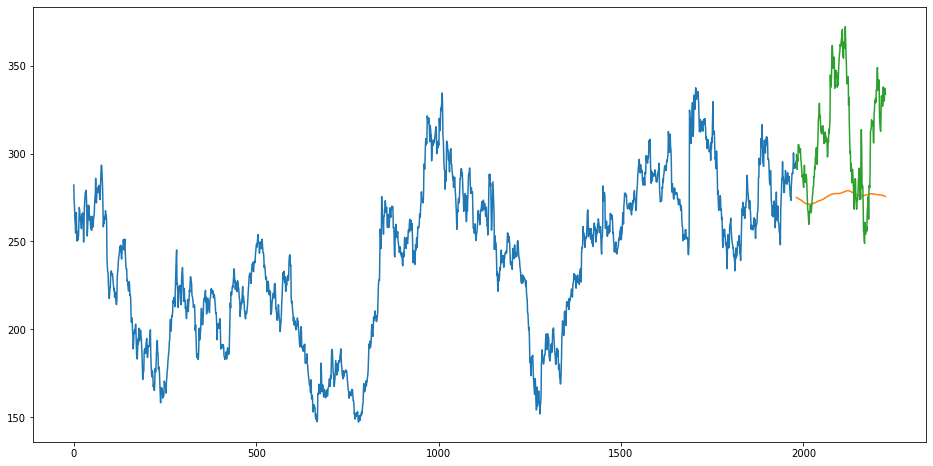

In [3]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds

plt.figure(figsize=(16,8))
plt.plot(train['Close'])
plt.plot(valid[['Predictions', 'Close']])